In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import	seaborn	as	sns
from	sklearn.model_selection	import	train_test_split
from	sklearn.preprocessing	import	StandardScaler,	LabelEncoder
from	sklearn.linear_model	import	LogisticRegression
from	sklearn.metrics	import	confusion_matrix,	accuracy_score,	precision_score,	recall_score

In [2]:
 
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:

 print("SampleData:\n",df.head())

Sample	Data:
     User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [4]:
# Encode	categorical	variable	(Gender)
label_encoder=LabelEncoder()
df['Gender']	=	label_encoder.fit_transform(df['Gender'])		# Male=1,	Female=0

In [5]:
#	Split	data	into	features	and	target	variable
X	=	df[['Age',	'Gender',	'EstimatedSalary']]
y	=	df['Purchased']

In [6]:
#	Split	into	training	and	test	sets
X_train,	X_test,	y_train,	y_test	=	train_test_split(X,	y,	test_size=0.25,	random_state=42)

In [7]:
# Feature	scaling
scaler	=	StandardScaler()
X_train	=	scaler.fit_transform(X_train)
X_test	=	scaler.transform(X_test)

In [10]:
#	Display	the	feature	scaling	formula
print("\nFeature Scaling Formula:X_scaled=(X-mean)/std_dev")


Feature Scaling Formula:X_scaled=(X-mean)/std_dev


In [12]:
#	Train	Logistic	Regression	model
classifier	=	LogisticRegression(random_state=42)
classifier.fit(X_train,	y_train)
#	Predict	on	test	set
y_pred	=	classifier.predict(X_test)
y_prob	=	classifier.predict_proba(X_test)[:,	1]		#	Get	probabilities	for	class	1	(Purchased)


In [13]:
#	Compute	confusion	matrix
cm	=	confusion_matrix(y_test,	y_pred)
TP	=	cm[1,	1]
FP	=	cm[0,	1]
TN	=	cm[0,	0]
FN	=	cm[1,	0]
#	Print	results
#	Compute	evaluation	metrics
accuracy	=	accuracy_score(y_test,	y_pred)
error_rate	=	1	-	accuracy
precision	=	precision_score(y_test,	y_pred,	zero_division=1)
recall	=	recall_score(y_test,	y_pred,	zero_division=1)

In [15]:
 #	Print	results
 print("\nConfusion Matrix:\n",	cm)


Confusion Matrix:
 [[61  2]
 [10 27]]


In [19]:
print(f"\nAccuracy:{accuracy:.2f}(Formula:(TP+TN)/(TP+FP+TN	+FN))")


Accuracy:0.88(Formula:(TP+TN)/(TP+FP+TN	+FN))


In [20]:
 print(f"Error	Rate:	{error_rate:.2f}	(Formula:	1	-	Accuracy)")

Error	Rate:	0.12	(Formula:	1	-	Accuracy)


In [21]:
# Print Precision
print(f"Precision: {precision:.2f} (Formula: TP / (TP + FP))")

Precision: 0.93 (Formula: TP / (TP + FP))


In [22]:
# Print Recall
print(f"Recall: {recall:.2f} (Formula: TP / (TP + FN))")

Recall: 0.73 (Formula: TP / (TP + FN))


In [23]:
# Display some predictions with their probabilities
df_results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred,
    "Probability": y_prob
})
print("\nSample Predictions with Probability:\n", df_results.head())


Sample Predictions with Probability:
    Actual  Predicted  Probability
0       0          0     0.256173
1       1          1     0.970592
2       0          0     0.022059
3       1          1     0.840024
4       0          0     0.016168


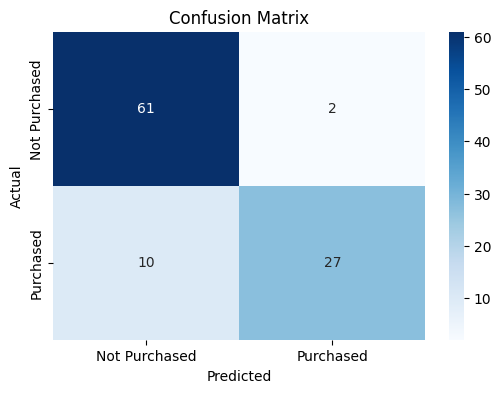

In [24]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Purchased', 'Purchased'],
            yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()